 
Федеральное государственное автономное образовательное
 учреждение высшего образования 
«Национальный исследовательский университет ИТМО»


Факультет технологий искусственного интеллекта


Статистика и анализ данных
`Лабораторная работа №1`


Студент: `Вдовин Герман Евгеньевич `

Группа: `J3113`

Учебная группа: `2.1`

ISU: `408366`

Преподаватель: `Свинцов Михаил Викторович`


### Ход работы

1. Рассчитал истинную геометрическую вероятность как отношение соответствующих площадей

2. При помощи генератора случайных чисел разместил точки в Ω (пространство элементарных исходов) и определил их принадлежность $𝓐(r)$ (окружность радиуса $r$)
        
3. Построил график  $\tilde{p}(n)$ , где $\tilde{p}$ - доля точек, которые попали в круг, а $n$ - количество точек
       
4. Построил график $ε(n) =  | \tilde{p}(n) - \tilde{p} |$ для анализа  изменения ошибки оценки геометрической вероятности


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# задаем константы

A = 100 # coord sys centre 
NUM_POINT = 500
NUM_RAD = 5

# COLORS = ['Green','Yellow','Orange','Turquoise','Red','Purple','Cyan','Pink','Magenta']
COLORS = [plt.cm.tab20(i % 20) for i in range(40)]

In [13]:
# последовательность радиусов - r_i = a/(i+1)
rad = [A / (i + 1) for i in range(NUM_RAD)]

## Расчет площадей окружностей и квадрата истинных геометрических вероятностей

$S_i = \pi \cdot \text{rad}_i^2$ - окружности

$S_{square} = (2a)^2$ - квадрат

$p_i = S_i / S_{square}$

In [14]:
arena_squares = (2 * A) ** 2
arena_circles = [np.pi * (r**2) for r in rad]
true_geometric_probability = [area / arena_squares for area in arena_circles]

In [15]:
# метод Монте-Карло

all_points = np.random.uniform(0, 2 * A, (NUM_POINT, 2))
points_in_circles = [np.empty((0, 2)) for _ in range(NUM_RAD)]
for point in all_points:
    x, y = point
    for i, r in enumerate(rad):
        if (x - A) ** 2 + (y - A) ** 2 < r**2:
            points_in_circles[i] = np.vstack([points_in_circles[i], point])

In [16]:
aw = [[] for _ in range(NUM_RAD)]

for j in range(NUM_RAD):
    n = 0
    rn = 0
    for i in range(NUM_POINT):
        n += 1
        x, y = np.random.random(2) * A
        if (x - A) ** 2 + (y - A) ** 2 < rad[j] ** 2:
            rn += 1
        aw[j].append((n, rn / n))

aw = np.array(aw)

### Визуализация

### Построим графики: сами окружности, график $\tilde{p}(n)$ (доля точек, которые попали в круг) и график анализа изменения ошибки $ε(n) = | \tilde{p}(n) - \tilde{p} |$ 

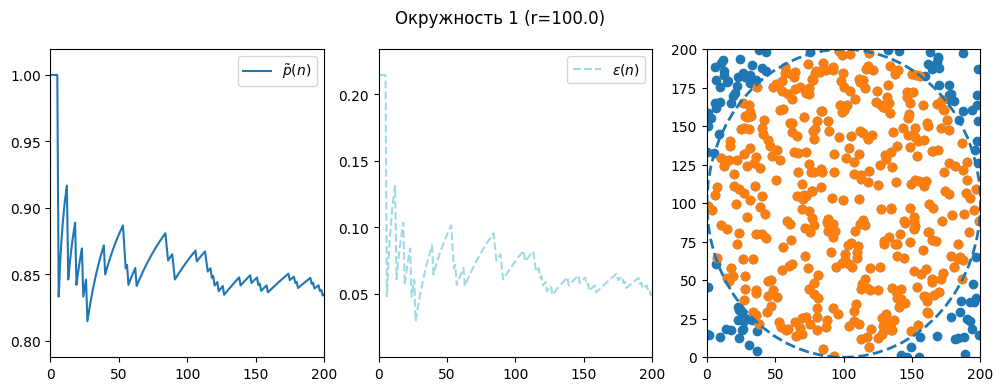

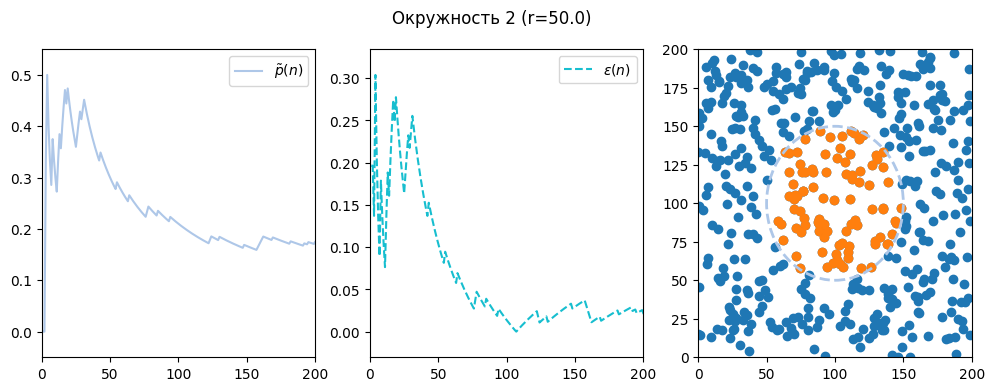

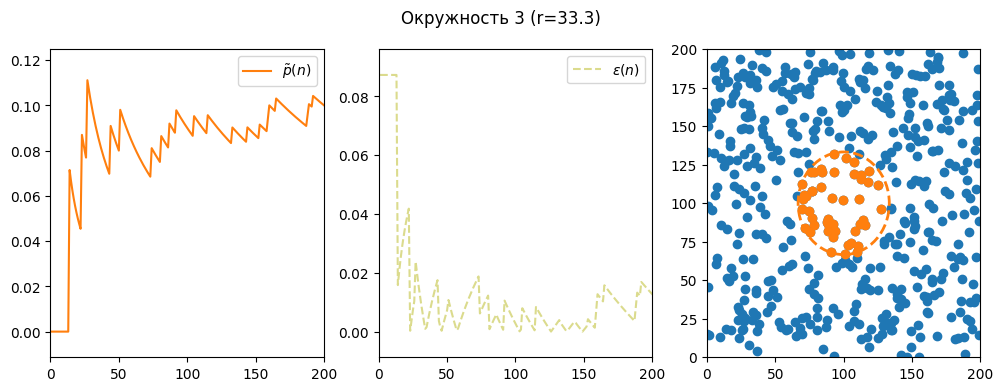

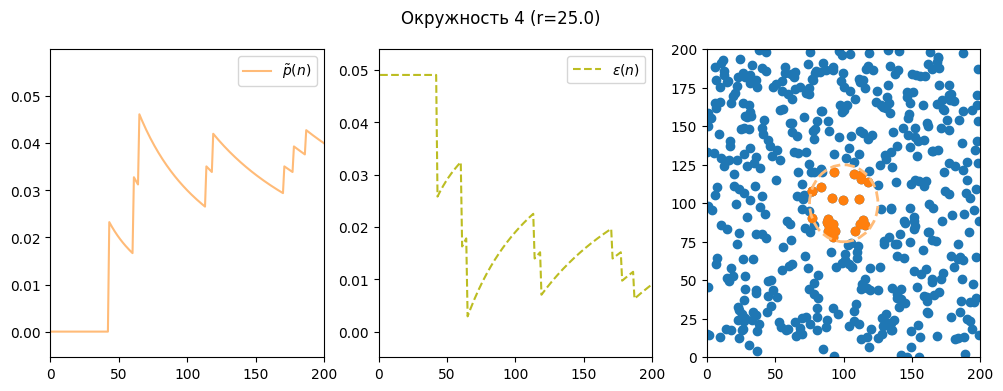

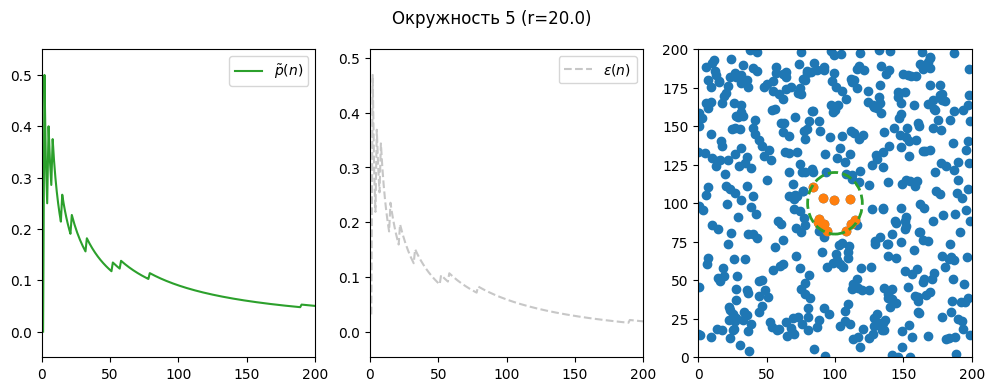

In [17]:
all_errors = []
for j in range(NUM_RAD):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), sharex=True)

    ax1.plot(
        [x for x, _ in aw[j]],
        [y for _, y in aw[j]],
        color=COLORS[j],
        label="$\\tilde{{p}}(n)$",
    )

    errors = np.abs(np.array([y for _, y in aw[j]]) - true_geometric_probability[j])
    all_errors.append(errors)
    ax2.plot(
        [x for x, _ in aw[j]], errors, color=COLORS[~j], linestyle="--", label="$ε(n)$"
    )

    ax3.scatter(all_points[:, 0], all_points[:, 1])
    ax3.scatter(points_in_circles[j][:, 0], points_in_circles[j][:, 1])
    ax3.add_patch(plt.Circle((A, A), rad[j], color=COLORS[j], fill=False, linestyle='dashed', linewidth=2))

    ax1.set_xlim(0, NUM_POINT)
    ax2.set_xlim(0, NUM_POINT)
    ax1.set_ylim(
        min([y for _, y in aw[j]])
        - 0.1 * (max([y for _, y in aw[j]]) - min([y for _, y in aw[j]])),
        max([y for _, y in aw[j]])
        + 0.1 * (max([y for _, y in aw[j]]) - min([y for _, y in aw[j]])),
    )
    ax2.set_ylim(
        min(errors) - 0.1 * (max(errors) - min(errors)),
        max(errors) + 0.1 * (max(errors) - min(errors)),
    )

    ax3.set_xlim(0, 2 * A)
    ax3.set_ylim(0, 2 * A)

    ax1.legend()
    ax2.legend()

    fig.suptitle(f"Окружность {j+1} (r={rad[j]:.1f})")
    plt.show()

### Для каждого радиуса вычислим необходимое количество случайных точек $N$, необходимых для достижения точности $ε_i$. Построим график зависимости $N(ε)$

In [8]:
epsilon_values = [10**-i for i in range(1, 8)]
N_values = []

for j in range(NUM_RAD):
    N_epsilon = []
    for epsilon in epsilon_values:
        mask = all_errors[j] <= epsilon
        if np.any(mask):
            N_min = aw[j][mask, 0][0]
        else:
            N_min = NUM_POINT
        N_epsilon.append(N_min)
    N_values.append(N_epsilon)


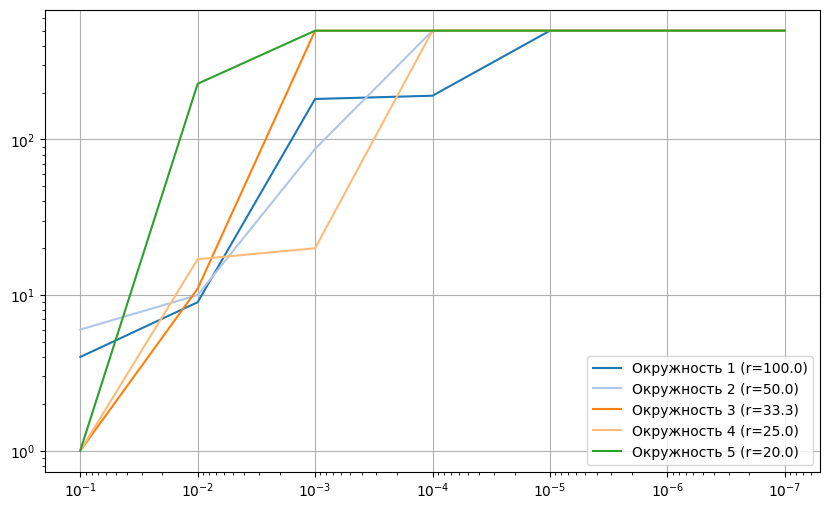

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
for j in range(NUM_RAD):
    ax.plot(epsilon_values, N_values[j], color=COLORS[j], label=f'Окружность {j+1} (r={rad[j]:.1f})')

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
ax.grid(True)
ax.invert_xaxis()

plt.show()